<a href="https://colab.research.google.com/github/freroldan5/froldanExamen/blob/master/Deber_Semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Delcaracion de librerías.

In [1]:
import numpy as np                         #Librería para el cálculo numérico y el análisis de datos. 
import pylab as plt                        #Librería para la creación de gráficos en 2D          
import networkx as nx                      #Libreria de redes de graphos.

In [2]:
listPuntos = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]  #rutas o puntos del obvejtivo

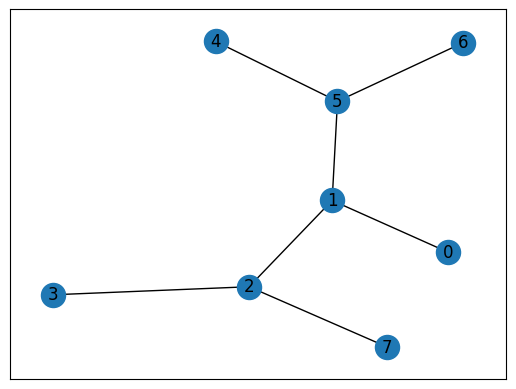

In [3]:
objetivo = 7                               #Número de rutas. 
g = nx.Graph()                             #Implemente la estructura de datos de graph dirigidos ponderados y no ponderados
g.add_edges_from(listPuntos)               #Es un método que nos sirve para iniciar una gráfica.
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g, pos)             #Organizar nodos.
nx.draw_networkx_edges(g, pos)             #Organziar uniones.
nx.draw_networkx_labels(g, pos)            #Muestra etiquetas.

plt.show()

In [4]:
MATRIX_SIZE = 8                                               #Máximo de puntos

In [5]:
R =  np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))     #Matriz de 5x5 de unos

In [6]:
R *= -1                                                       #Matriz con pura pérdida

In [7]:
for punt in listPuntos:                                      #Moverse por los puntos    
   print(punt)
   if punt[1] == objetivo:
    R[punt] = 100
   else:
    R[punt] = 0 

   if punt[0] == objetivo:
      R[punt[::-1]] = 100
   else:
      R[punt[::-1]] = 0

R [objetivo, objetivo] = 100                                   #Se forma el hambiente.                                    

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [8]:
R                                                              #Impresión del ambiente formado "matriz de caminos y ganancias"

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [9]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gama = 0.8                                                    #Corrección al algoritmo
estadoInicial = 1                                             #Punto de partidad

In [10]:
def accionesPosibles(estado):
  estadoActual_fila = R[estado]
  acAvance = np.where(estadoActual_fila>=0) [1]

  return acAvance

In [11]:
acDisponible = accionesPosibles(estadoInicial)

In [12]:
def pruebSiguienteAccion(rangoAccionesPosibles):
  acSiguiente = int(np.random.choice(acDisponible,1))
  return acSiguiente

In [13]:
accion = pruebSiguienteAccion(acDisponible)

In [14]:
def actualizar(estadoActual, accion, gamma):
  indiceMayor = np.where(Q[accion, ] == np.max(Q[accion, ]))[1]

  if indiceMayor.shape[0] > 1:
    indiceMayor = int(np.random.choice(indiceMayor, size = 1))
  else:
    indiceMayor = int (indiceMayor)

  valorMaximo = Q[accion, indiceMayor]

  Q[estadoActual, accion] = R[estadoActual, accion] + gamma*valorMaximo

  print('Valor máximo', R[estadoActual, accion] + gamma*valorMaximo)

  if(np.max(Q)>0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return 0   

In [15]:
actualizar(estadoInicial, accion, gama)

Valor máximo 0.0


0

In [16]:
puntajes = []

for i in range(10):
  estadoActual = np.random.randint(0, int(Q.shape[0]))
  acDisponible = accionesPosibles(estadoActual)
  accion = pruebSiguienteAccion(acDisponible) 
  puntaje = actualizar(estadoActual, accion, gama)
  puntajes.append(puntaje)

print("Matriz Q, entrenada!!")

print(Q/np.max(Q)*100)

Valor máximo 0.0
Valor máximo 0.0
Valor máximo 0.0
Valor máximo 0.0
Valor máximo 0.0
Valor máximo 100.0
Valor máximo 180.0
Valor máximo 244.0
Valor máximo 0.0
Valor máximo 0.0
Matriz Q, entrenada!!
[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.]]


El camino más eficiente: 
[0, 7]


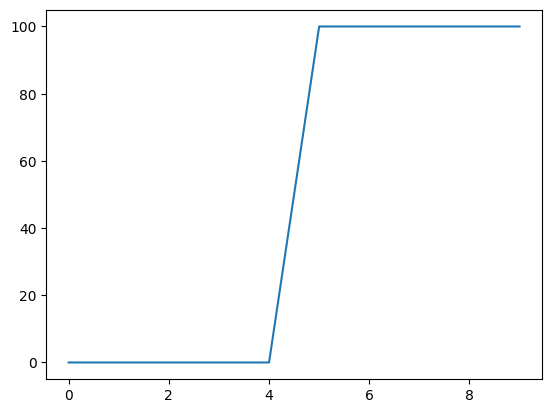

In [17]:
estadoActual = 0
paso = [estadoActual]

while estadoActual !=7:
  indiceSiguientePaso = np.where(Q[estadoActual, ] == np.max(Q[estadoActual, ]))[1]

  if indiceSiguientePaso.shape[0] > 1 :
    indiceSiguientePaso = int(np.random.choice(Q.shape[1], size=1))
  else:
    indiceSiguientePaso = int(indiceSiguientePaso)

  paso.append(indiceSiguientePaso)
  estadoActual = indiceSiguientePaso

print("El camino más eficiente: ")
print(paso)

plt.plot(puntajes)
plt.show()